In [1]:
import glob
import numpy as np
import os

In [2]:
idx_train = glob.glob("../dataset/selfie/training/*.png")
idx_test = glob.glob("../dataset/selfie/testing/*.png")

In [3]:
partition = {}

train_path = "../dataset/selfie/training/"
test_path  = "../dataset/selfie/testing/"

IDs = []

for train_i in idx_train:
    train_ID = train_i.split("/")[-1]
    if 'matte' not in train_ID:
        IDs.append(os.path.join(train_path, train_ID))

for test_i in idx_test:
    test_ID = test_i.split("/")[-1]
    if 'matte' not in test_ID:
        IDs.append(os.path.join(test_path, test_ID))

IDs.sort()

In [4]:
# add supervisely dataset

In [5]:
len(IDs)

2000

In [6]:
IDs[:1]

['../dataset/selfie/testing/00001.png']

In [7]:
import os 
import glob
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np 

dataset_path = "../dataset/Supervisely_person_dataset/"

In [8]:
os.listdir(dataset_path)

['.DS_Store',
 'ds6',
 'ds1',
 'ds8',
 'ds10',
 'ds11',
 'ds9',
 'ds7',
 'Readme.md',
 '.ipynb_checkpoints',
 'ds2',
 'ds5',
 'ds13',
 'ds12',
 'ds4',
 'ds3']

In [9]:
ds_list = sorted([os.path.join(dataset_path, p) for p in os.listdir(dataset_path) if "." not in p])

In [10]:
ds_list

['../dataset/Supervisely_person_dataset/ds1',
 '../dataset/Supervisely_person_dataset/ds10',
 '../dataset/Supervisely_person_dataset/ds11',
 '../dataset/Supervisely_person_dataset/ds12',
 '../dataset/Supervisely_person_dataset/ds13',
 '../dataset/Supervisely_person_dataset/ds2',
 '../dataset/Supervisely_person_dataset/ds3',
 '../dataset/Supervisely_person_dataset/ds4',
 '../dataset/Supervisely_person_dataset/ds5',
 '../dataset/Supervisely_person_dataset/ds6',
 '../dataset/Supervisely_person_dataset/ds7',
 '../dataset/Supervisely_person_dataset/ds8',
 '../dataset/Supervisely_person_dataset/ds9']

In [11]:
mask_machine_list = []

for ds in ds_list:
    mask_machine_list += [os.path.join(ds, "masks_machine", p) for p in os.listdir(os.path.join(ds, 'masks_machine'))]
    

In [12]:
mask_machine_list[:3]

['../dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-541523_matte.png',
 '../dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-395196_matte.png',
 '../dataset/Supervisely_person_dataset/ds1/masks_machine/pexels-photo-588561_matte.png']

In [13]:
for ds in ds_list:

    IDs += [os.path.join(ds, "img", p) for p in os.listdir(os.path.join(ds, "img"))]

In [14]:
len(IDs)

7711

In [19]:
IDs[2000:]

['../dataset/Supervisely_person_dataset/ds1/img/suit-business-man-business-man-37547.png',
 '../dataset/Supervisely_person_dataset/ds1/img/pexels-photo-371161.png',
 '../dataset/Supervisely_person_dataset/ds1/img/pexels-photo-417040.png',
 '../dataset/Supervisely_person_dataset/ds1/img/pexels-photo-206470.png',
 '../dataset/Supervisely_person_dataset/ds1/img/brunette-cute-fashion-female-41366.png',
 '../dataset/Supervisely_person_dataset/ds1/img/person-couple-love-romantic.png',
 '../dataset/Supervisely_person_dataset/ds1/img/pexels-photo-105857.png',
 '../dataset/Supervisely_person_dataset/ds1/img/pexels-photo-70292.png',
 '../dataset/Supervisely_person_dataset/ds1/img/kid-girl-child-cute-160433.png',
 '../dataset/Supervisely_person_dataset/ds1/img/pexels-photo-305555.png',
 '../dataset/Supervisely_person_dataset/ds1/img/pexels-photo-326603.png',
 '../dataset/Supervisely_person_dataset/ds1/img/pexels-photo-532363.png',
 '../dataset/Supervisely_person_dataset/ds1/img/pexels-photo-31369

In [53]:
excluding = []

for ID in IDs:
    
    mask_ID = ID.split(".p")[0] + "_matte.png"

    if 'Supervisely' in mask_ID:
        mask_ID = mask_ID.replace("/img/", "/masks_machine/")
        mask_ID = mask_ID.replace(".jpeg", "")
        
    mask = cv2.imread(mask_ID, cv2.IMREAD_GRAYSCALE)
    
    if "Supervisely" in mask_ID:
        mask = mask * 255
    
    mask = cv2.resize(mask, (256,256))
    edge = cv2.Canny(mask, 50, 100)  
    
    k = np.int((mask[mask > 50].shape[0] / (256 * 256)) * 50)
    
    if k < 7:
        excluding.append(ID)
#         print(mask_ID)


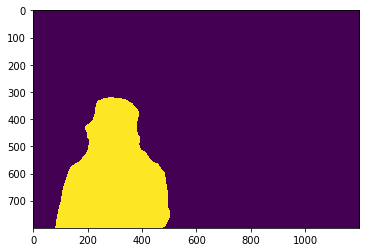

In [52]:
# k == 7 인 예
plt.imshow(cv2.imread("../dataset/Supervisely_person_dataset/ds11/masks_machine/pexels-photo-187996_matte.png", cv2.IMREAD_GRAYSCALE))


In [55]:
len(excluding)

1914

In [56]:
## excluding small object images

for ex in excluding:
    IDs.remove(ex)

In [57]:
len(IDs), IDs

(5797,
 ['../dataset/selfie/testing/00001.png',
  '../dataset/selfie/testing/00002.png',
  '../dataset/selfie/testing/00003.png',
  '../dataset/selfie/testing/00004.png',
  '../dataset/selfie/testing/00005.png',
  '../dataset/selfie/testing/00006.png',
  '../dataset/selfie/testing/00007.png',
  '../dataset/selfie/testing/00008.png',
  '../dataset/selfie/testing/00009.png',
  '../dataset/selfie/testing/00010.png',
  '../dataset/selfie/testing/00011.png',
  '../dataset/selfie/testing/00012.png',
  '../dataset/selfie/testing/00013.png',
  '../dataset/selfie/testing/00014.png',
  '../dataset/selfie/testing/00015.png',
  '../dataset/selfie/testing/00016.png',
  '../dataset/selfie/testing/00017.png',
  '../dataset/selfie/testing/00018.png',
  '../dataset/selfie/testing/00019.png',
  '../dataset/selfie/testing/00020.png',
  '../dataset/selfie/testing/00021.png',
  '../dataset/selfie/testing/00022.png',
  '../dataset/selfie/testing/00023.png',
  '../dataset/selfie/testing/00024.png',
  '../dat

#### Portrait dataset

In [15]:
# # save
# np.save("./dataset/img_paths.npy", IDs)

# img_paths = np.load("./dataset/img_paths.npy")

####  Include supervisely dataset

In [17]:
# save with supervisely dataset

# np.save("../dataset/img_paths_with_supervisely.npy", IDs)

# img_paths = np.load("../dataset/img_paths_with_supervisely.npy")

####  exclude small object images

In [59]:
# save without wrong mask label

# np.save("../dataset/img_paths_with_supervisely_nosmallobject.npy", IDs)

# img_paths = np.load("../dataset/img_paths_with_supervisely_nosmallobject.npy")